<center><h1>Class Weights for BC3 Model</h1>
John Ignacio R.M. 30 Jun 2020</center>

In [1]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada2.data import read_dataset, split_dataset
from ada2.model import BinClassifModel3 as BC3
from ada2.plot import plot_confidence_matrix
import pandas as pd
from os.path import exists

#keras
from keras.optimizers import adam, adadelta, adagrad, adamax
from keras.backend import clear_session
import gc

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
source_path = "../processed_data/xtohh"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420

In [3]:
#read xtohh dataset SR 2
df = read_dataset(source_path, signal, bg, "SR", 2)
df

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.001020,1,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.887240,1631.67020,263.697630
1,0.001117,1,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.033330,1293.40280,463.512360
2,0.000925,1,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.559220,1659.84830,80.008150
3,0.001158,1,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.607220,1075.30920,109.524925
4,0.001120,1,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.350300,1595.76110,244.283460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0.006433,0,402.06714,0.109710,-1.277847,68576.34,486.71262,-0.060529,1.469456,120999.410,2.747302,2.752572,-0.883233,84.210686,891.92240,192.862270
8802,0.004849,0,542.29900,1.579771,-2.624035,84161.26,411.07132,1.205967,0.438185,56194.777,3.062220,3.084951,-0.216563,59.169407,970.41110,136.471160
8803,0.004849,0,548.63104,-0.033452,2.621298,79095.04,416.03915,0.336025,-0.553298,70408.830,3.108589,3.130470,-0.352454,34.371227,983.20233,133.526060
8804,0.007816,0,683.98340,-0.029910,-0.760806,110728.80,609.47140,0.094448,2.401307,148632.220,3.121072,3.123549,0.351719,55.616740,1320.47700,75.680750


In [4]:
lrs = [5e-3, 1e-2, 5e-2, 1e-1]
optis = [adam, adadelta, adagrad, adamax]
activs = ["relu", "softplus"]

splits = [
    (0.6, 0.2, 0.2), (0.5, 0.3, 0.2), #80:20
    (0.5, 0.2, 0.3), (0.4, 0.3, 0.3), #70:30
    (0.4, 0.2, 0.4), (0.3, 0.3, 0.4), #60:40
]

sets = [split_dataset(df, *split, seed) for split in splits]
ths = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

combs = [(sets[i], splits[i], lr, opti, acti) for i in range(len(splits))
                                                        for lr in lrs
                                                            for opti in optis
                                                                for acti in activs]
len(combs)

192

## Comb 38: Training without class weights

In [5]:
combs[38][1:]

((0.5, 0.3, 0.2), 0.005, keras.optimizers.Adamax, 'relu')

In [6]:
sets_38 = combs[38][0]
model_38 = BC3(sets_38["x"]["test"].shape[1], 0.005, adamax, "relu")
model_38.load("../saved_models/tun_hyperparams_2", f"t2_comb38")

2020-07-01 17:08:00.122959: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-01 17:08:00.135109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-01 17:08:00.135384: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-07-01 17:08:00.135427: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-01 17:08:00.135444: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-07-01 17:08:00.136969: I tensorflow/stream_executor/platform/def

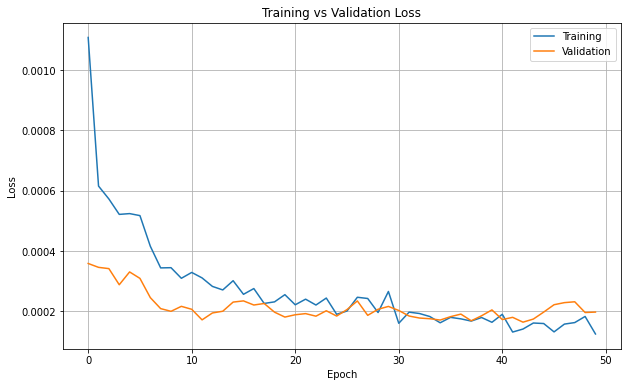

In [7]:
model_38.plot_loss()

In [8]:
eval_38 = model_38.complete_evaluation(
    sets_38["x"]["test"], sets_38["y"]["test"], sets_38["w"]["test"], 0.4,
)
print("Accuracy:", eval_38["accuracy"])
pd.DataFrame(eval_38["weighted_class_report"])

Accuracy: 0.9750283768444948


,0,1,macro avg,weighted avg
precision,0.919167,0.992642,0.955905,0.980274
recall,0.964005,0.982842,0.973423,0.979671
f1-score,0.941052,0.987717,0.964385,0.979862
support,0.392325,1.938392,2.330717,2.330717


2020-07-01 17:08:54.709873: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


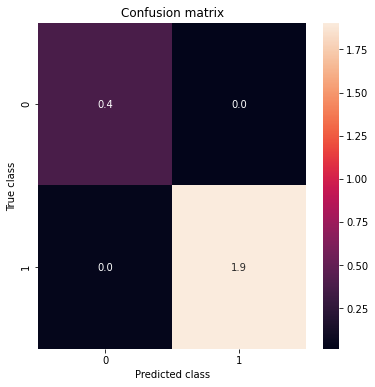

In [9]:
plot_confidence_matrix(eval_38["weighted_cm"], 6, 6, '.1f')

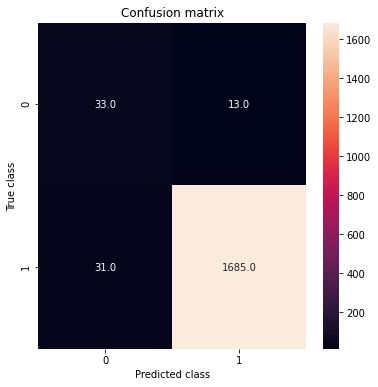

In [10]:
plot_confidence_matrix(eval_38["cm"], 6, 6, '.1f')

## Comb 38: Training with class weights

In [11]:
class_weights = {
    0: 5,
    1: 1.
}
class_weights

{0: 5, 1: 1.0}

In [12]:
model_38cw = BC3(sets_38["x"]["test"].shape[1], 0.005, adamax, "relu")
model_38cw.fit(
    sets_38["x"]["train"], sets_38["y"]["train"], sets_38["w"]["train"],
    sets_38["x"]["val"], sets_38["y"]["val"], sets_38["w"]["val"],
    50, verbose = 2, class_weights = class_weights,
)

Train on 4025 samples, validate on 3019 samples
Epoch 1/50
 - 1s - loss: 0.0025 - val_loss: 7.4507e-04
Epoch 2/50
 - 1s - loss: 0.0017 - val_loss: 6.1248e-04
Epoch 3/50
 - 1s - loss: 0.0015 - val_loss: 6.6251e-04
Epoch 4/50
 - 1s - loss: 0.0011 - val_loss: 4.2843e-04
Epoch 5/50
 - 1s - loss: 0.0011 - val_loss: 6.2515e-04
Epoch 6/50
 - 1s - loss: 9.6762e-04 - val_loss: 4.2069e-04
Epoch 7/50
 - 1s - loss: 8.8689e-04 - val_loss: 3.6967e-04
Epoch 8/50
 - 1s - loss: 8.3214e-04 - val_loss: 4.1403e-04
Epoch 9/50
 - 1s - loss: 7.6703e-04 - val_loss: 2.9883e-04
Epoch 10/50
 - 1s - loss: 6.9764e-04 - val_loss: 4.2599e-04
Epoch 11/50
 - 1s - loss: 7.6345e-04 - val_loss: 3.5718e-04
Epoch 12/50
 - 1s - loss: 5.9330e-04 - val_loss: 3.4884e-04
Epoch 13/50
 - 1s - loss: 7.7119e-04 - val_loss: 3.6485e-04
Epoch 14/50
 - 1s - loss: 6.0479e-04 - val_loss: 3.1125e-04
Epoch 15/50
 - 1s - loss: 6.3403e-04 - val_loss: 2.7748e-04
Epoch 16/50
 - 1s - loss: 6.3985e-04 - val_loss: 2.9350e-04
Epoch 17/50
 - 1s - l

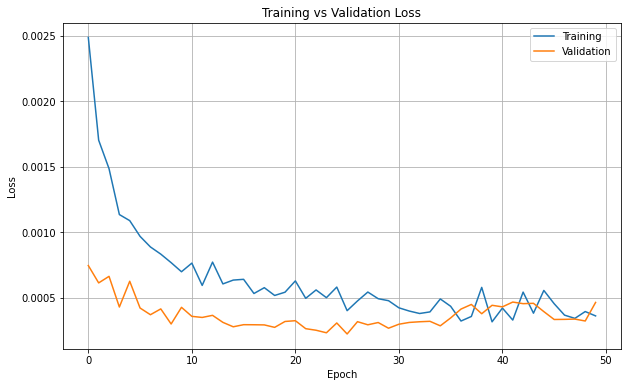

In [13]:
model_38cw.plot_loss()

In [14]:
eval_38cw = model_38cw.complete_evaluation(
    sets_38["x"]["test"], sets_38["y"]["test"], sets_38["w"]["test"], 0.4,
)
print("Accuracy:", eval_38cw["accuracy"])
pd.DataFrame(eval_38cw["weighted_class_report"])

Accuracy: 0.9120317820658342


,0,1,macro avg,weighted avg
precision,0.693058,0.982307,0.837682,0.933618
recall,0.918334,0.917682,0.918008,0.917792
f1-score,0.789949,0.948896,0.869422,0.922140
support,0.392325,1.938392,2.330717,2.330717


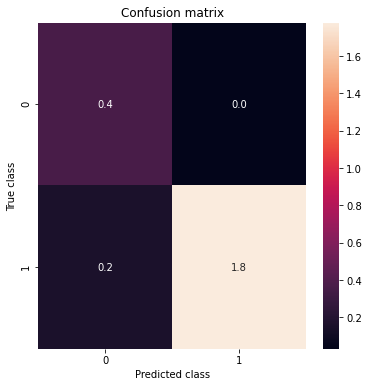

In [15]:
plot_confidence_matrix(eval_38cw["weighted_cm"], 6, 6, '.1f')

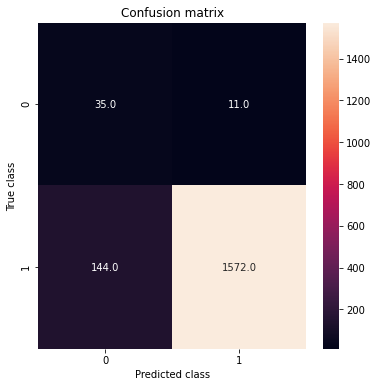

In [16]:
plot_confidence_matrix(eval_38cw["cm"], 6, 6, '.1f')